# Imports

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# 1. Vacation search results

In [2]:
dfpl = pd.read_csv('multiTimelinePL.csv')

In [3]:
dfusa = pd.read_csv('multiTimelineUSA.csv')

In [4]:
dfuk = pd.read_csv('multiTimelineUK.csv')

In [5]:
dfpl.info

<bound method DataFrame.info of         Kategoria: Wszystko
Miesiąc  vacation: (Polska)
2004-01                  42
2004-02                 100
2004-03                  49
2004-04                  90
...                     ...
2021-11                  36
2021-12                  68
2022-01                  69
2022-02                  85
2022-03                  73

[220 rows x 1 columns]>

In [6]:
dfpl.drop('Miesiąc', inplace=True)
dfusa.drop('Miesiąc', inplace=True)
dfuk.drop('Miesiąc', inplace=True)
dfpl

,Kategoria: Wszystko
2004-01,42
2004-02,100
2004-03,49
2004-04,90
2004-05,71
...,...
2021-11,36
2021-12,68
2022-01,69
2022-02,85


## Set datetime index for each dataframe.

In [7]:
dfpl.index = pd.to_datetime(dfpl.index)
dfusa.index = pd.to_datetime(dfusa.index)
dfuk.index = pd.to_datetime(dfuk.index)
dfpl

,Kategoria: Wszystko
2004-01-01,42
2004-02-01,100
2004-03-01,49
2004-04-01,90
2004-05-01,71
...,...
2021-11-01,36
2021-12-01,68
2022-01-01,69
2022-02-01,85


## Rename columns using country codes (eg. PL) as headers.

In [8]:
pl = dfpl.rename(columns={'Kategoria: Wszystko': 'PL'})
usa = dfusa.rename(columns={'Kategoria: Wszystko': 'USA'})
uk = dfuk.rename(columns={'Kategoria: Wszystko': 'UK'})
pl

,PL
2004-01-01,42
2004-02-01,100
2004-03-01,49
2004-04-01,90
2004-05-01,71
...,...
2021-11-01,36
2021-12-01,68
2022-01-01,69
2022-02-01,85


In [9]:
pl.index.name = 'Month'
usa.index.name = 'Month'
uk.index.name = 'Month'
pl

,PL
Month,
2004-01-01,42
2004-02-01,100
2004-03-01,49
2004-04-01,90
2004-05-01,71
...,...
2021-11-01,36
2021-12-01,68
2022-01-01,69


## Combine the search counts in one dataframe.

In [10]:
concatCountry = pd.concat([usa, uk, pl], axis=1)
concatCountry

,USA,UK,PL
Month,,,
2004-01-01,88,39,42
2004-02-01,76,31,100
2004-03-01,72,36,49
2004-04-01,67,33,90
2004-05-01,80,33,71
...,...,...,...
2021-11-01,48,25,36
2021-12-01,62,43,68
2022-01-01,53,31,69


## Present the time series for all countries in one plot.

In [11]:
concatCountry[["USA", "UK", "PL"]] = concatCountry[["USA", "UK", "PL"]].apply(pd.to_numeric)
concatCountry

,USA,UK,PL
Month,,,
2004-01-01,88,39,42
2004-02-01,76,31,100
2004-03-01,72,36,49
2004-04-01,67,33,90
2004-05-01,80,33,71
...,...,...,...
2021-11-01,48,25,36
2021-12-01,62,43,68
2022-01-01,53,31,69


In [12]:
concatCountry.dtypes

USA    int64
UK     int64
PL     int64
dtype: object

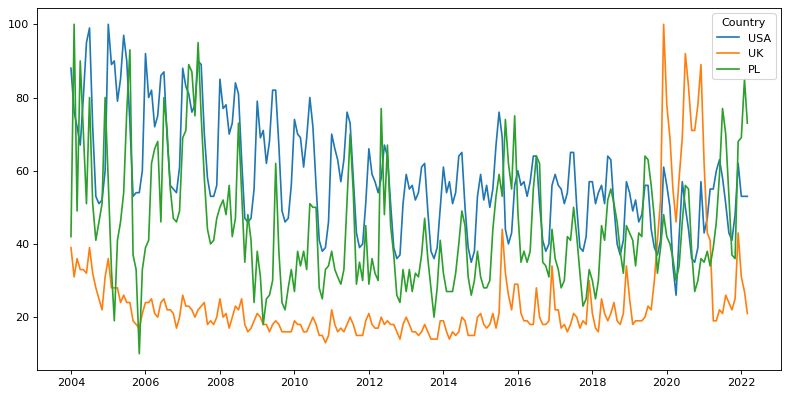

In [13]:
plt.figure(figsize=(12, 6), dpi=80)

plt.plot(concatCountry['USA'], label='USA')
plt.plot(concatCountry['UK'], label='UK')
plt.plot(concatCountry['PL'], label='PL')

plt.legend(title='Country')

plt.show()

## Generate descriptive statistics.

In [14]:
concatCountry.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 219 entries, 2004-01-01 to 2022-03-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   USA     219 non-null    int64
 1   UK      219 non-null    int64
 2   PL      219 non-null    int64
dtypes: int64(3)
memory usage: 6.8 KB


In [15]:
concatCountry.describe()

,USA,UK,PL
count,219.000000,219.000000,219.000000
mean,58.684932,24.684932,44.488584
std,14.957932,14.536455,16.690755
min,26.000000,13.000000,10.000000
25%,50.000000,18.000000,32.000000
50%,56.000000,20.000000,41.000000
75%,67.500000,25.000000,52.500000
max,100.000000,100.000000,100.000000


## Show three histograms in one plot.

<AxesSubplot:ylabel='Frequency'>

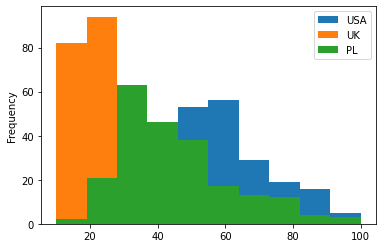

In [16]:
concatCountry.plot.hist()

## Show three kernel densities in one plot.

<AxesSubplot:ylabel='Density'>

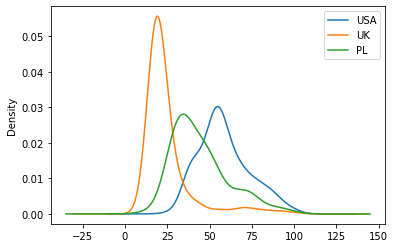

In [17]:
concatCountry.plot.kde()

# 2 Average temperature dataset

## Import dataset.

In [18]:
df = pd.read_csv('stlouis_temp.csv', skiprows=[0,1,2,3])
df.dtypes

Date         int64
Value      float64
Anomaly    float64
dtype: object

## Convert the index to datetime format.

In [19]:
df['Date'] = df['Date'].map(str)
df.dtypes

Date        object
Value      float64
Anomaly    float64
dtype: object

In [20]:
df['Date'] = df['Date'].str[:4] + '-' + df['Date'].str[4:]
df

,Date,Value,Anomaly
0,1938-04,57.0,0.5
1,1938-05,65.3,-1.1
2,1938-06,74.0,-1.7
3,1938-07,81.1,1.3
4,1938-08,81.3,3.3
...,...,...,...
1001,2021-09,73.5,3.3
1002,2021-10,63.9,4.7
1003,2021-11,46.2,0.9
1004,2021-12,45.7,11.1


In [21]:
df.index = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)
df

,Value,Anomaly
Date,,
1938-04,57.0,0.5
1938-05,65.3,-1.1
1938-06,74.0,-1.7
1938-07,81.1,1.3
1938-08,81.3,3.3
...,...,...
2021-09,73.5,3.3
2021-10,63.9,4.7
2021-11,46.2,0.9


## Locate missing values and change them to nan.

In [22]:
missingValues = len(df[df['Value'] == -99])
missingValues

1

In [23]:
missingValues = len(df[df['Anomaly'] == -99])
missingValues

0

In [24]:
missingValue = df[df['Value'] == -99].index[0]
missingValue

'2013-03'

In [25]:
df.at[missingValue, 'Value'] = np.NaN

In [26]:
missingValues = len(df[df['Value'] == -99])
missingValues

0

## Use the interpolate function to put a value in the Nan’s place.

In [27]:
df.fillna(df['Value'].mean(), inplace = True)

In [28]:
missingValues = len(df[df['Value'] == np.NaN])
missingValues

0

In [29]:
missingValues = len(df[df['Anomaly'] == np.NaN])
missingValues

0

## Plot the average temperature time series, the corresponding histogram, and kernel density plot.

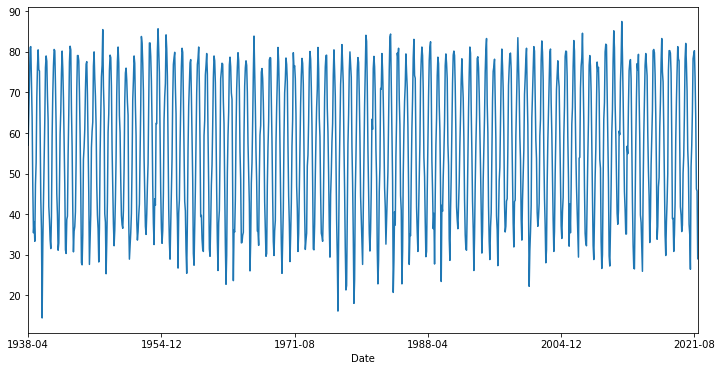

In [30]:
df['Value'].plot(figsize = (12, 6)).autoscale(axis = 'x', tight = True)

<AxesSubplot:ylabel='Frequency'>

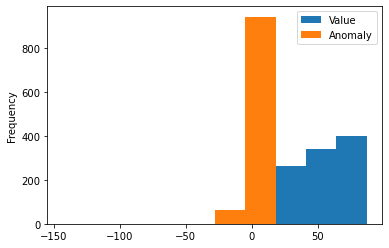

In [31]:
df.plot.hist()

<AxesSubplot:ylabel='Density'>

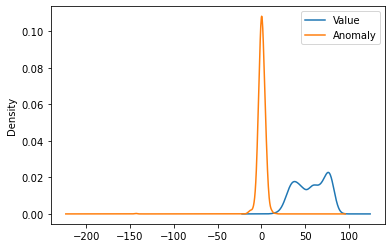

In [32]:
df.plot.kde()

## Generate descriptive statistics.

In [33]:
df.describe()

,Value,Anomaly
count,1006.000000,1006.000000
mean,56.732438,0.211730
std,17.511288,5.873084
min,14.400000,-143.600000
25%,40.700000,-1.900000
50%,58.500000,0.400000
75%,73.475000,2.700000
max,87.500000,15.900000
